# Carregar as bibliotecas

In [1]:
import numpy as np
from skimage import io, data, transform, color,util
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
def show(img_list, caption_list, Axis=False):
    n = len(img_list)
    f, ax = plt.subplots(1,n, figsize=(10+5*(n-1),10))
    for i in range(n):
        ax[i].imshow(img_list[i], cmap='gray')
        ax[i].set_title(caption_list[i])
        if not Axis:
            ax[i].set_axis_off()

In [3]:
def mapping(img):
    nimg = util.img_as_float(img)
    mmin = np.min(nimg)
    nimg = nimg - mmin
    mmax = np.max(nimg)
    return nimg/mmax

# Questão 1

<p>Testar as funções de transformação geométrica:
rotação, escala, translação, cisalhamento em imagens.

*   rotação: *transform.rotate(...)*
*   escala: *transform.rescale(...)*
*   traslação: *transform.AffineTransform(...)* e *transform.warp(..)*
*   cisalhamento: *transform.AffineTransform(...)* e *transform.warp(..)*

<ol>
  <li> <b>skimage.transform.rotate</b>(image, angle, resize=False, center=None, order=None, mode='constant', cval=0, clip=True, preserve_range=False):
  Rotate image by a certain angle around its center.
      
  Parameters
  <ul>
  <li> image: ndarray. Input image.</li>
  <li> angle: float. Rotation angle in degrees in counter-clockwise direction.</li>
  <li> resize: bool, optional. Determine whether the shape of the output image will be automatically calculated, so the complete rotated image exactly fits. Default is False. </li>
  <li> center: iterable of length 2. The rotation center. If center=None, the image is rotated around its center, i.e. center=(cols / 2 - 0.5, rows / 2 - 0.5). Please note that this parameter is (cols, rows), contrary to normal skimage ordering. </li>
  </ul>
  Result
  <ul>
  <li> rotated: ndarray. Rotated version of the input.</li>
  </ul>
      
  <li> <b>skimage.transform.rescale</b>(image, scale, channel_axis=None): Scale image by a certain factor.
      
  Parameters
    <ul>
    <li> image: ndarray. Input image.</li>
    <li> scale: {float, tuple of floats}. Scale factors. S</li>
    <li> channel_axis: int or None, optional. If None, the image is assumed to be a grayscale (single channel) image. Otherwise, this parameter indicates which axis of the array corresponds to channels </li>
    </ul>
  Result
    <ul>
    <li> rotated: ndarray. Scaled version of the input.</li>
    </ul>

  <li><b>skimage.transform.AffineTransform</b>(matrix=None, scale=None, rotation=None, shear=None, translation=None, dimensionality=2)</li>
    
  Parameters
  <ul>
  <li> matrix: (D+1, D+1) array, optional. Homogeneous transformation matrix. </li>
  <li> scale: {s as float or (sx, sy) as array, list or tuple}, optional.  Scale factor(s). </li>
  <li> rotation: float, optional. Rotation angle in counter-clockwise direction as radians. Only available for 2D.</li>
  <li> shear: float, optional. Shear angle in counter-clockwise direction as radians. Only available for 2D.</li>
  <li> translation: (tx, ty) as array, list or tuple, optional. Translation parameters. Only available for 2D.</li>
  </ul>

  <li><b> skimage.transform.warp</b>(image, inverse_map, map_args={}, output_shape=None, order=None, mode='constant', cval=0.0, clip=True, preserve_range=False): Warp an image according to a given coordinate transformation.</li>
    
  Parameters
  <ul>
  <li> image: ndarray. Input image. </li>
  <li> inverse_map: transformation object. Inverse coordinate map, which transforms coordinates in the output images into their corresponding coordinates in the input image. </li>
  <li> map_args: dict, optional. Keyword arguments passed to inverse_map.</li>
  <li> output_shape: tuple (rows, cols), optional. Shape of the output image generated. By default the shape of the input image is preserved. </li>
  <li> order: int, optional. The order of interpolation. The order has to be in the range 0-5: (0: Nearest-neighbor, 1: Bi-linear (default), 2: Bi-quadratic, 3: Bi-cubic, 4: Bi-quartic, 5: Bi-quintic)</li>
  </ul>
  Result
  <ul>
  <li> warped: double ndarray. The warped input image.</li>
  </ul>   
</ol>
</p>


(512, 512, 3)


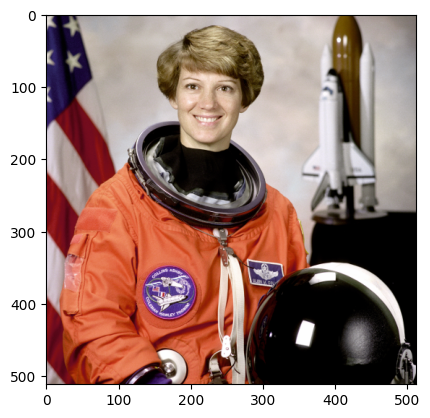

In [4]:
img = data.astronaut()
plt.imshow(img)
print(img.shape)

<p>Realizar as seguintes transformações geoméricas:
  <ul>
  <li>Rotaçao de 23 graus. A imagem resultante deve incluir a imagem completa</li>
  <li>Reescalar a imagem para a metade</li>
  <li>Trasladar em 50 pixels en linhas e 100 pixels em colunas. Usar a combinação das funções <i>AffineTransform</i> e <i>warp</i></li>
  <li>Aplicar o efeito de cisalhamento (shear) em $\frac{\pi}{4}$ graus</li>
  </ul>
</p>

In [11]:
# Rotação da imagem
rotacao = transform.rotate(img,23, resize = True)
# Mudança em escala
escala = transform.rescale(img,scale = 0.5, channel_axis= 2)
# Traslação da imagem
matriz_traslacao = transform.AffineTransform(translation=(100,50))
traslacao = transform.warp(img,matriz_traslacao)
# Cisalhamento
matriz_shear = transform.AffineTransform(shear = np.pi/4)
shear =  transform.warp(img,matriz_shear)


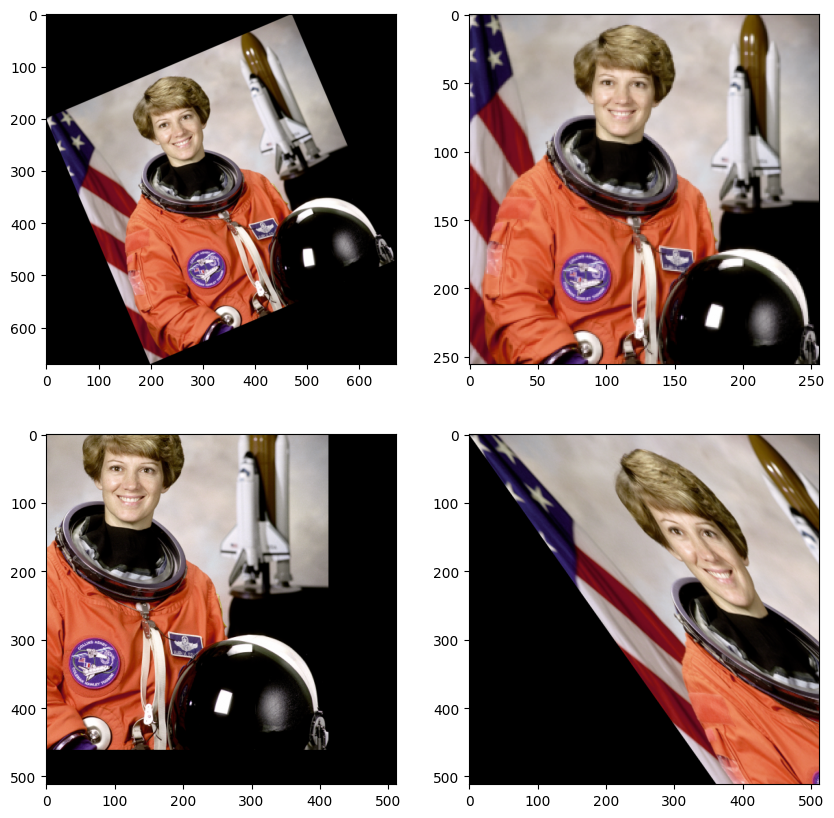

In [12]:
f, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(rotacao)
ax[0,1].imshow(escala)
ax[1,0].imshow(traslacao)
ax[1,1].imshow(shear)

# Questão 2

Dadas duas imagens, misturar ambas imagens gerando uma terceira. A forma de misturar é a seguinte: a terceira imagem estará formada pelas linhas impares da primeira imagem e as pares da segunda imagem.

<table><tr>
<td> <img src="https://drive.google.com/uc?id=1k0FG4pT6WMjFeG-V63OBXNS7_CvfY5m_" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://drive.google.com/uc?id=15yt6Tt5liol_jKWbkfcNXV-SoeaY706s" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://drive.google.com/uc?id=1FboaUm6DeM-HsHRXQfyt1tPgl6rLkGQK" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>





In [13]:
def merge(img1, img2):
  nimg = img1.copy()
  nimg[1::2,:,:] = img2[1::2,:,:]
  return nimg


In [14]:
lenna = io.imread('https://drive.google.com/uc?id=1k0FG4pT6WMjFeG-V63OBXNS7_CvfY5m_')
clown = io.imread('https://drive.google.com/uc?id=15yt6Tt5liol_jKWbkfcNXV-SoeaY706s')

print(f'Tamanho imagem Lenna: {lenna.shape}')
print(f'Tamanho imagem clown: {clown.shape}')

new_clown = util.img_as_ubyte(color.rgba2rgb(clown))
merged = merge(lenna, new_clown)

Tamanho imagem Lenna: (512, 512, 3)
Tamanho imagem clown: (512, 512, 4)


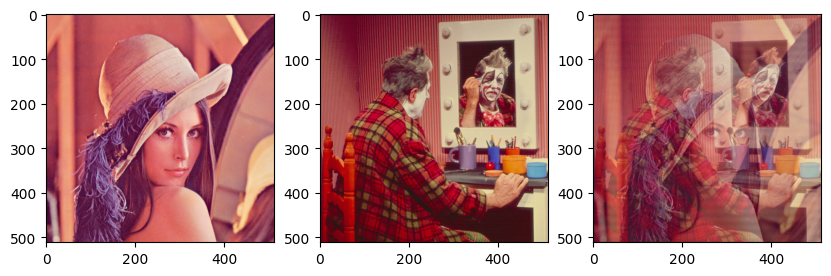

In [15]:
f, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(lenna)
ax[1].imshow(clown)
ax[2].imshow(merged)

# Questão 3

<p> Na seguinte imagem o valor das intensidades dos niveis de cinza estão concentrados na escala intermediaria. Verique isso calculando o histograma da imagem. Logo, corrija esse problema a través do algoritmo <i>contrast-stretching()</i>. </p>


<center>
<img src="https://drive.google.com/uc?id=1Tils6Uo-h2fh3JoTcsaMexoKR1AaMXqb" alt="Drawing" style="width: 250px;"/>
</center>


<p>
Realizar os seguinte passos:
<ol>
<li> Calcular o histograma da imagem</li>
<li> Implementar a função <i>constrast-stretching</i>.  Ela é definida da seguinte forma: $$s = T(r) = \frac{1}{1 + (m/r)^E}$$ onde $r$ denota a intensidade da imagem, $m$ é um valor dentro do intervalo [0,1] e $E$ um valor positivo. A intensidade $r$ da imagem deve estar normalizada entre [0,1]</li>
</ol>

<center>
<img src="https://drive.google.com/uc?id=1hPgC1WDTmuU8A2E6AeEXPmanf_vW81_a" alt="Drawing" width="230" />
</center>


</p>

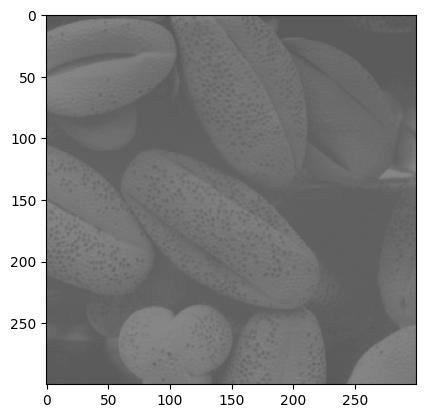

In [16]:
img2 = io.imread("https://drive.google.com/uc?id=1Tils6Uo-h2fh3JoTcsaMexoKR1AaMXqb")
plt.imshow(img2, cmap='gray', vmin =0, vmax=255)

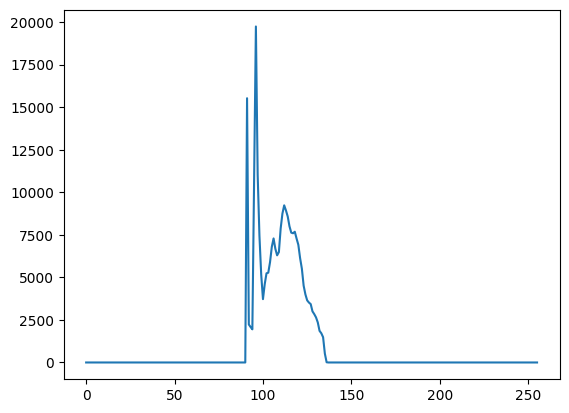

In [21]:
# cálculo do histograma
hist = ndimage.histogram(img2,min = 0,max = 255, bins=256)
plt.plot(hist)

In [22]:
# implementação da função constrast streaching
def constrast_streaching(img, m=0.5, E=2):
    nimg = util.img_as_float(img)
    nimg = 1 / (1 + (m / nimg) ** E)
    return nimg

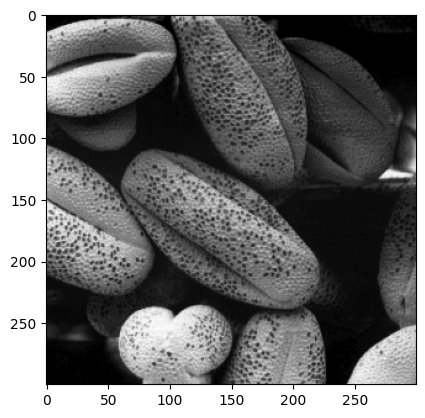

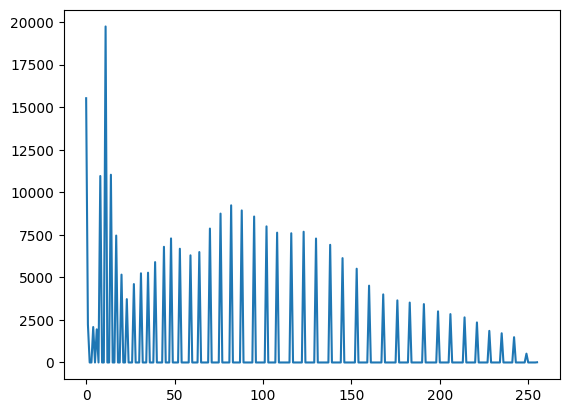

In [23]:
# aplica a funçao c na imagem com baixo contraste
nimg = mapping(constrast_streaching(img2, m=0.5, E=9))
plt.imshow(nimg, cmap='gray', vmin=0, vmax=1)

# calcula o histograma da imagem corrigida
h2 = ndimage.histogram(nimg, min=0, max=1, bins=256)
plt.figure()
plt.plot(h2)

### 3.1 Aplicar a função <i>constrast_streaching</i> nas seguintes imagens


<table><tr>
<td> <img src="https://drive.google.com/uc?id=15tblJ6rU1GvCcTT60eN8jxOV81km2Okr" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://drive.google.com/uc?id=1-th5aYMyQUYmAXtVjUGdohzOJlhx2Oy-" alt="Drawing" width="390" height=auto>/> </td>
</tr></table>




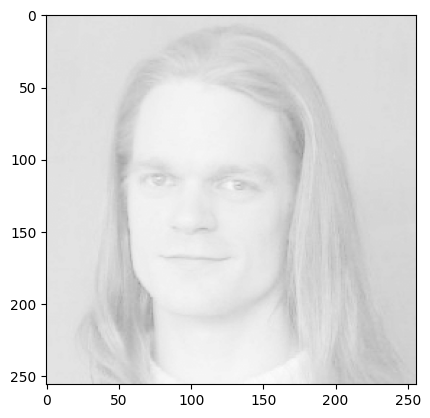

In [31]:
nimg10 = io.imread('https://drive.google.com/uc?id=15tblJ6rU1GvCcTT60eN8jxOV81km2Okr')
plt.imshow(nimg10)

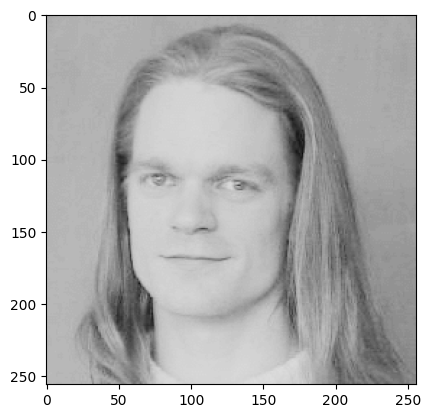

In [37]:
nimg = constrast_streaching(nimg10,m=0.8, E = 9)
plt.imshow(nimg, cmap='gray', vmin=0, vmax=1)

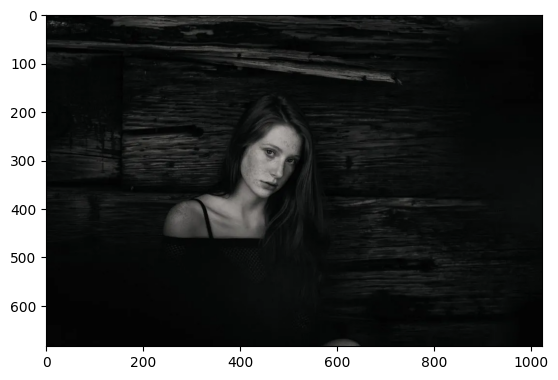

In [38]:
nimg10 = io.imread('https://drive.google.com/uc?id=1-th5aYMyQUYmAXtVjUGdohzOJlhx2Oy-')
plt.imshow(nimg10)

<ipython-input-22-e87685a8ae02>:4: RuntimeWarning: divide by zero encountered in divide
  nimg = 1 / (1 + (m / nimg) ** E)


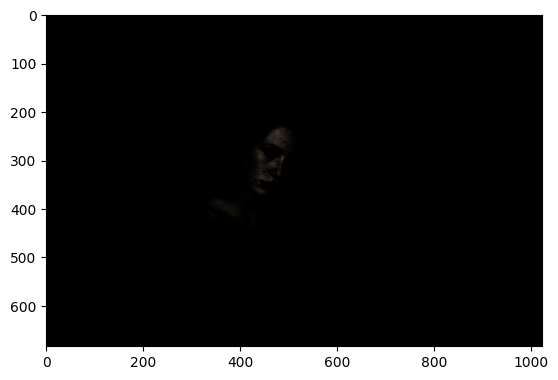

In [39]:
nimg = constrast_streaching(nimg10,m=0.8, E = 9)
plt.imshow(nimg, cmap='gray', vmin=0, vmax=1)

# Questão 4

A tranformação Wave é definida como:
    \begin{eqnarray}
    nx(x,y) &=& x + 20 sin (2*\pi * y / 150) \nonumber  \\
    ny(x,y) &=& y \nonumber
    \end{eqnarray}
onde $x$ e $y$ representam as coordenadas atuais da imagem, e $nx$ e $ny$ são as novas coordenas depois da transformação.

O efeito gerado com a função é o seguinte:
<center>
<img src="https://drive.google.com/uc?id=1xXN1wY_Zdj6w8BIkF2PIU1Z99RI5OwDf" alt="Drawing" width="230" />
</center>


In [40]:
def wave(xy):
    xy[:, 1] += 20*np.sin(2*np.pi*xy[:, 0]/150)
    return xy

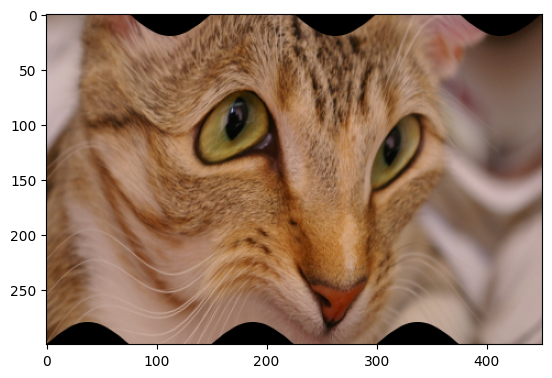

In [41]:
im = data.chelsea()
nimg = transform.warp(im, wave)
plt.imshow(nimg)

### Modifique o código para gerar o seguinte efeito:

<center>
<img src="https://drive.google.com/uc?id=1peV9ks80_w3mI5fDjD6h7uPqEINzxA0a" alt="Drawing" width="300" />
</center>

In [44]:
def wave2(xy):
    xy = wave(xy)
    xy[:, 0] += 20*np.sin(2*np.pi*xy[:, 1]/150)
    return xy

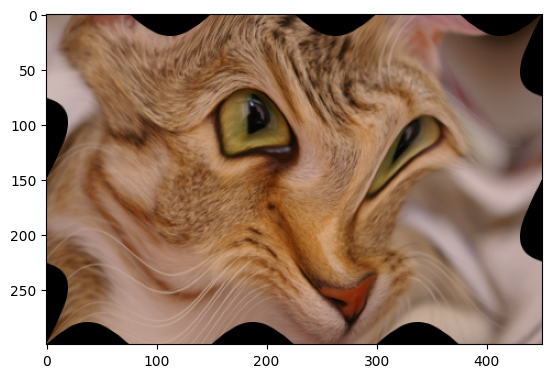

In [46]:
nimg = transform.warp(im, wave2)
plt.imshow(nimg)